In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Tabla de Clientes
df_clientes = pd.read_excel('data/Clientes.xlsx', sheet_name='clientes.csv')
#print(dataframe.duplicated())
print(df_clientes.dtypes)

id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                    object
fecha_alta        datetime64[ns]
dtype: object


In [8]:
# Tabla de Productos
# Se identificó que la columna 'categoria' tiene valores inconsistentes
# en la que el nombre del producto no concuerda con la categoría asignada.
df_productos = pd.read_excel('data/Productos.xlsx')
print(df_productos.dtypes)

id_producto         int64
nombre_producto    object
categoria          object
precio_unitario     int64
dtype: object


In [9]:
# Tabla de Ventas
df_ventas = pd.read_excel('data/Ventas.xlsx')
print("Antes de eliminar columnas redundantes:")
print(df_ventas.dtypes)

# Se debe de eliminar la columna 'nombre_cliente', 'email' ya que es redundante
# porque ya se tiene el id_producto que hace referencia a la tabla productos
df_ventas = df_ventas.drop(columns=['nombre_cliente', 'email'])
print("\nDespués de eliminar columnas redundantes:")
print(df_ventas.dtypes)

# Ordenar por fecha de venta
df_ventas = df_ventas.sort_values(by='fecha')
print("==============================")
print(f"Ventas ordenadas por fecha: \n{df_ventas}")

Antes de eliminar columnas redundantes:
id_venta                   int64
fecha             datetime64[ns]
id_cliente                 int64
nombre_cliente            object
email                     object
medio_pago                object
dtype: object

Después de eliminar columnas redundantes:
id_venta               int64
fecha         datetime64[ns]
id_cliente             int64
medio_pago            object
dtype: object
Ventas ordenadas por fecha: 
    id_venta      fecha  id_cliente     medio_pago
83        84 2024-01-02          72       efectivo
54        55 2024-01-04         100             qr
68        69 2024-01-06          42             qr
7          8 2024-01-06          66  transferencia
89        90 2024-01-08          46             qr
..       ...        ...         ...            ...
87        88 2024-06-21          37       efectivo
35        36 2024-06-25           5        tarjeta
14        15 2024-06-27          56  transferencia
11        12 2024-06-28          96 

In [10]:
# Tabla de Detalle_ventas
df_detalle_ventas = pd.read_excel('data/Detalle_ventas.xlsx')
print("Antes de eliminar columnas redundantes:")
#print(df_detalle_ventas.dtypes,'\n')

# Se debe de eliminar la columna 'nombre_producto', 'precio_unitario' ya que es redundante
# porque ya se tiene el id_producto que hace referencia a la tabla productos
df_detalle_ventas = df_detalle_ventas.drop(columns=['nombre_producto', 'precio_unitario'])
#print("\nDespués de eliminar columnas redundantes:")
#print(df_detalle_ventas.dtypes)

print("==============================")
# Calcular la cantidad total vendida por producto y ordenarla de forma descendente
#cantidad_total = df_detalle_ventas.groupby('id_producto')['cantidad'].sum().reset_index().sort_values(by='cantidad', ascending=False)
#print(f"Cantidad total vendida por producto: \n{cantidad_total}")

# Unir tabla de detall_ventas con ventas para obtener el id de cliente
detalle_ventas_con_cliente = df_detalle_ventas.merge(df_ventas, on='id_venta', how='left')

# Unir con clientes para obtener el nombre del cliente
detalle_ventas_con_cliente = detalle_ventas_con_cliente.merge(df_clientes, on='id_cliente', how='left')

# Unir con productos para obtener el nombre del producto
detalle_ventas_con_cliente = detalle_ventas_con_cliente.merge(df_productos, on='id_producto', how='left')

# Calcular la cantidad total vendida por producto en cada ciudad
productos_por_ciudad = (
    detalle_ventas_con_cliente
    .groupby(['ciudad', 'nombre_producto'])['cantidad']
    .sum().reset_index()
    .sort_values(by=['ciudad', 'cantidad'], ascending=[True, False]))

print(productos_por_ciudad)


Antes de eliminar columnas redundantes:
          ciudad             nombre_producto  cantidad
16   Alta Gracia  Hamburguesas Congeladas x4        14
31   Alta Gracia  Mermelada de Frutilla 400g        11
39   Alta Gracia                   Ron 700ml        10
0    Alta Gracia        Aceite de Girasol 1L         9
8    Alta Gracia         Dulce de Leche 400g         9
..           ...                         ...       ...
222  Villa Maria              Garbanzos 500g         2
226  Villa Maria           Pan Lactal Blanco         2
233  Villa Maria      Sopa Instantánea Pollo         1
234  Villa Maria               Trapo de Piso         1
235  Villa Maria        Té Verde 20 saquitos         1

[239 rows x 3 columns]


In [11]:
# Agrupamos solo por producto
estadisticas_productos = (
    detalle_ventas_con_cliente
    .groupby('nombre_producto')['cantidad']
    .agg(['sum', 'mean', 'median', 'var', 'std'])
    .reset_index()
)

# Moda (la forma más sencilla es con value_counts)
moda_productos = (
    detalle_ventas_con_cliente
    .groupby('nombre_producto')['cantidad']
    .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name='moda')
)

# Unimos todo
estadisticas_productos = estadisticas_productos.merge(moda_productos, on='nombre_producto', how='left').sort_values(by='sum', ascending=False)

print(estadisticas_productos)


               nombre_producto  sum      mean  median       var       std  \
75        Salsa de Tomate 500g   27  3.857143     5.0  2.809524  1.676163   
71          Queso Rallado 150g   26  2.888889     3.0  1.611111  1.269296   
37  Hamburguesas Congeladas x4   24  4.000000     4.0  1.200000  1.095445   
88           Vino Blanco 750ml   22  3.666667     4.0  2.666667  1.632993   
2        Aceitunas Verdes 200g   22  3.666667     3.5  1.466667  1.211060   
..                         ...  ...       ...     ...       ...       ...   
54            Maní Salado 200g    3  3.000000     3.0       NaN       NaN   
25    Detergente Líquido 750ml    2  2.000000     2.0       NaN       NaN   
20    Chocolate con Leche 100g    2  2.000000     2.0       NaN       NaN   
5               Alfajor Triple    2  2.000000     2.0       NaN       NaN   
33         Galletitas Vainilla    2  2.000000     2.0       NaN       NaN   

    moda  
75     5  
71     2  
37     4  
88     5  
2      3  
..   ... 

In [12]:
estadisticas_por_ciudad = (
    detalle_ventas_con_cliente
    .groupby(['ciudad', 'nombre_producto'])['cantidad']
    .agg(['sum', 'mean', 'median', 'var', 'std'])
    .reset_index()
)

print(estadisticas_por_ciudad.sort_values(by=['sum'], ascending=False))

          ciudad             nombre_producto  sum      mean  median       var  \
120      Cordoba           Vino Blanco 750ml   16  4.000000     4.0  1.333333   
16   Alta Gracia  Hamburguesas Congeladas x4   14  4.666667     5.0  0.333333   
31   Alta Gracia  Mermelada de Frutilla 400g   11  3.666667     3.0  1.333333   
165   Rio Cuarto       Chocolate Amargo 100g   11  3.666667     3.0  1.333333   
58    Carlos Paz         Desodorante Aerosol   11  3.666667     4.0  0.333333   
..           ...                         ...  ...       ...     ...       ...   
207   Rio Cuarto           Vino Blanco 750ml    1  1.000000     1.0       NaN   
209   Rio Cuarto                Whisky 750ml    1  1.000000     1.0       NaN   
233  Villa Maria      Sopa Instantánea Pollo    1  1.000000     1.0       NaN   
234  Villa Maria               Trapo de Piso    1  1.000000     1.0       NaN   
235  Villa Maria        Té Verde 20 saquitos    1  1.000000     1.0       NaN   

          std  
120  1.1547

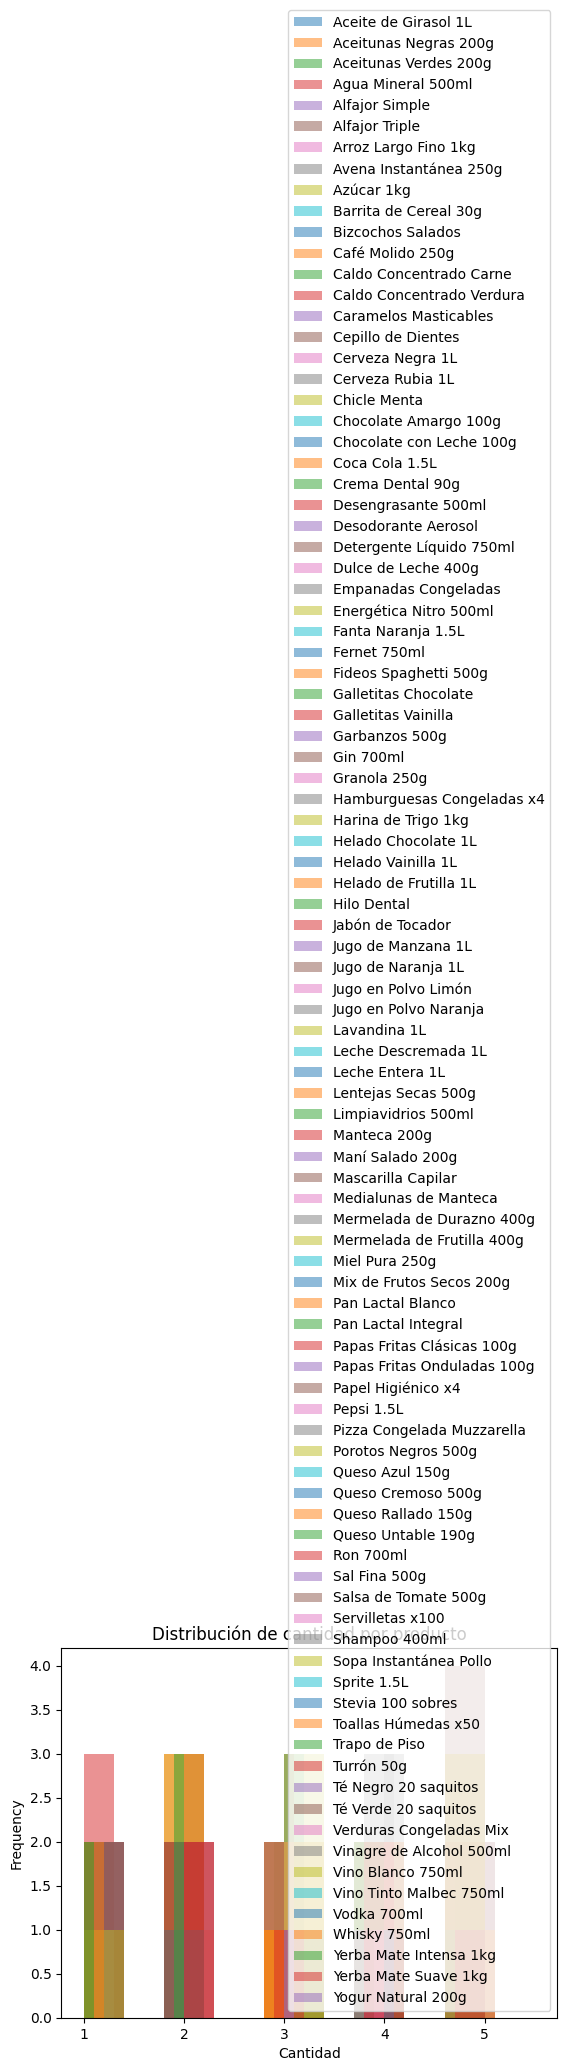

In [13]:
# Histograma por producto
detalle_ventas_con_cliente.groupby('nombre_producto')['cantidad'].plot(
    kind='hist', alpha=0.5, legend=True, title='Distribución de cantidad por producto'
)
plt.xlabel('Cantidad')
plt.show()

In [14]:
# Resumen estadistico para cantidad
print("==============================")
print("Resumen estadístico de la cantidad de productos vendidos:")
print(detalle_ventas_con_cliente['cantidad'].describe())

# Resumen estadistico para productos 



Resumen estadístico de la cantidad de productos vendidos:
count    343.000000
mean       2.962099
std        1.366375
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: cantidad, dtype: float64


C:\Users\kevin\AppData\Local\Temp\ipykernel_24044\1125553190.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


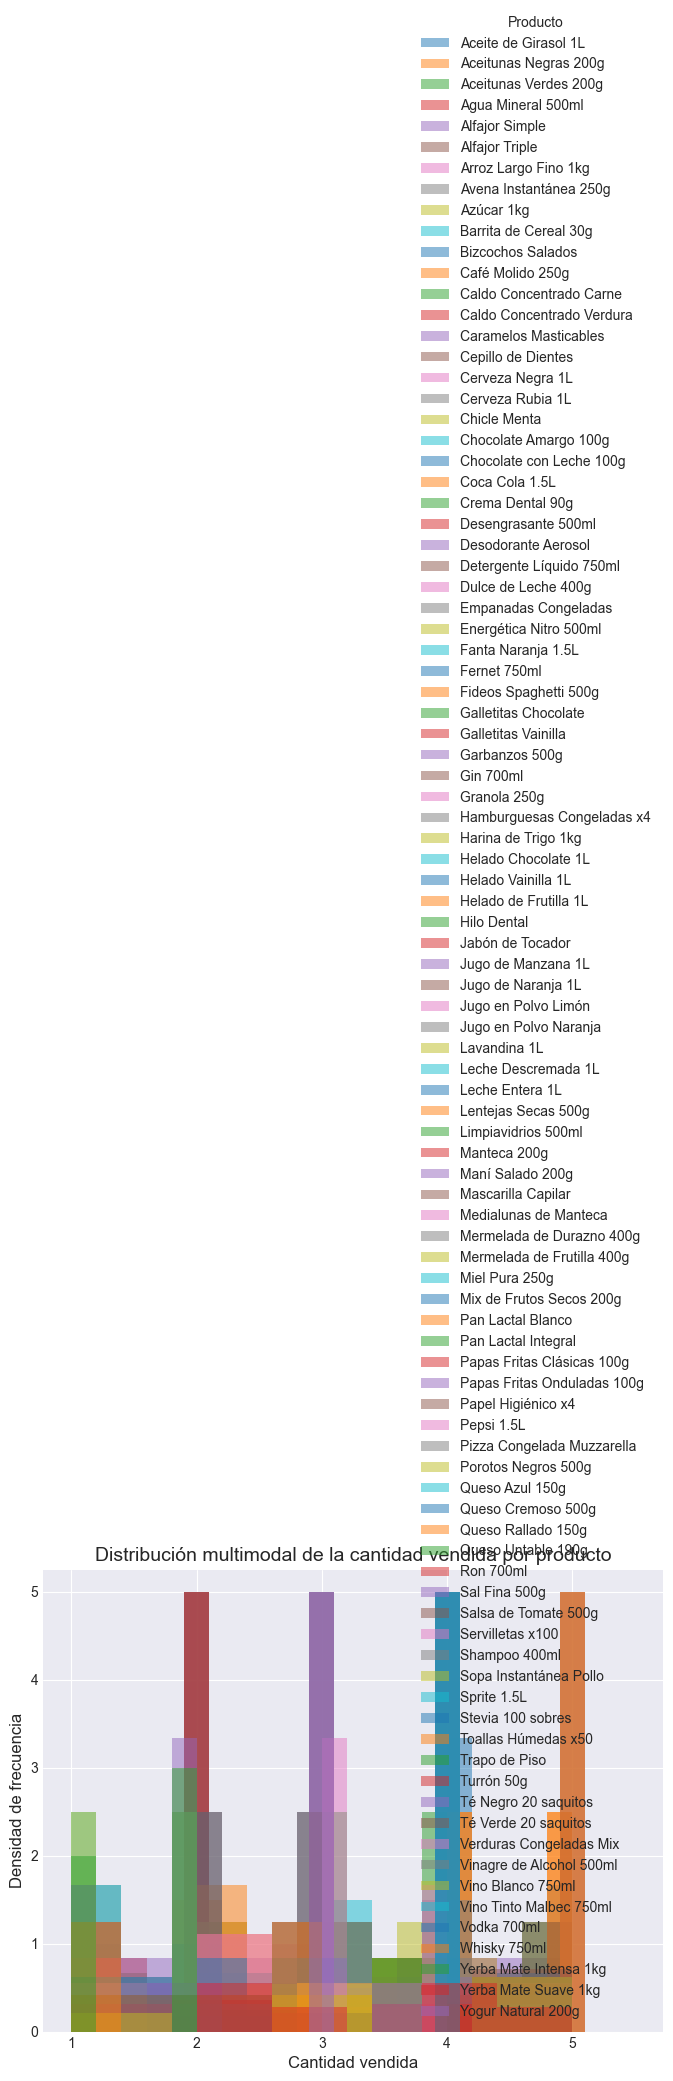

In [15]:
# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')

# Crear figura
plt.figure(figsize=(8, 6))

# Graficar cada producto en el mismo eje
for producto, datos in detalle_ventas_con_cliente.groupby('nombre_producto'):
    plt.hist(
        datos['cantidad'],
        bins=5,
        alpha=0.5,
        label=producto,
        density=True  # Normaliza el histograma (para comparar proporciones)
    )

plt.title('Distribución multimodal de la cantidad vendida por producto', fontsize=14)
plt.xlabel('Cantidad vendida', fontsize=12)
plt.ylabel('Densidad de frecuencia', fontsize=12)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()
